In [281]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
import matplotlib

from sklearn.linear_model import LinearRegression

    
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc("font",size=15)


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics   

pd.set_option('display.max_row', 5000)
pd.set_option('display.max_columns', 100)

# Data Load

In [2]:
trash=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/trash.csv",encoding='cp949')
print(trash.shape)
trash.head(5)

(13733, 10)


,년도,수거장소,월,일,분류,상세분류,개수,위도,경도,측정소
0,2019,포항 칠포,1,1,플라스틱류,플라스틱 부표,1,36.132391,129.390274,포항
1,2019,포항 칠포,1,1,플라스틱류,담배꽁초,1,36.132391,129.390274,포항
2,2019,포항 칠포,1,1,플라스틱류,"음식물포장용기(고추장통, 간장병 등)",1,36.132391,129.390274,포항
3,2019,포항 칠포,1,1,플라스틱류,"세제용기(주방, 세탁, 목욕 등), 화장품",2,36.132391,129.390274,포항
4,2019,포항 칠포,1,1,천연 섬유,"옷, 모자, 양말, 천, 장갑(면장갑, 목장갑, 코팅목장갑) 등 천연 섬유만 해당",2,36.132391,129.390274,포항


In [3]:
wind=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/wind_avg.csv",encoding='cp949')
print(wind.shape)
wind.head(5)

(936, 5)


,년도,월,평균풍향(deg),평균풍속(m/s),측정소
0,2008,1,156.062331,3.253527,거제도
1,2008,2,188.422334,2.228063,거제도
2,2008,3,152.323432,3.197278,거제도
3,2008,4,152.292539,3.180208,거제도
4,2008,5,154.370810,3.276091,거제도


In [4]:
visit_beach=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/merge_beach.csv",encoding='cp949')
print(visit_beach.shape)
visit_beach.head(5)

(478, 7)


,Unnamed: 0,수거장소,해수욕장명,수거장소에 대한해수욕장의 상대적 위치,년도,월,방문객수
0,2,거제 두모몽돌해변,구영해수욕장,북,2019,8,1940
1,3,거제 두모몽돌해변,구영해수욕장,북,2019,7,688
2,4,거제 두모몽돌해변,구영해수욕장,북,2018,8,1060
3,5,거제 두모몽돌해변,구영해수욕장,북,2018,7,997
4,6,거제 두모몽돌해변,구영해수욕장,북,2017,8,2980


In [5]:
harbor=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/harbor.csv",encoding='cp949')
print(visit_beach.shape)
visit_beach.head(5)

(478, 7)


,Unnamed: 0,수거장소,해수욕장명,수거장소에 대한해수욕장의 상대적 위치,년도,월,방문객수
0,2,거제 두모몽돌해변,구영해수욕장,북,2019,8,1940
1,3,거제 두모몽돌해변,구영해수욕장,북,2019,7,688
2,4,거제 두모몽돌해변,구영해수욕장,북,2018,8,1060
3,5,거제 두모몽돌해변,구영해수욕장,북,2018,7,997
4,6,거제 두모몽돌해변,구영해수욕장,북,2017,8,2980


# EDA--------------------------------------------------------------------------------------------------------------------------------------------

# 1. 전체 기간

### 1-1. 수집기간 동안 총 쓰레기 수 변화

In [6]:
year_month_cnt_pivot=trash.pivot_table(index=['년도','월'],
                 values='개수',
                 aggfunc=sum).reset_index()

In [7]:
year_month_cnt_pivot

,년도,월,개수
0,2010,1,2882
1,2010,3,3140
2,2010,5,3143
3,2010,7,2237
4,2010,9,3082
5,2010,11,2823
6,2011,1,1854
7,2011,3,2746
8,2011,5,2662
9,2011,7,3289


In [8]:
year_pivot=year_month_cnt_pivot.pivot_table(index='년도',
                 values='개수',
                 aggfunc=sum).reset_index()

In [9]:
year_pivot

,년도,개수
0,2010,17307
1,2011,16885
2,2012,16575
3,2013,9789
4,2014,17640
5,2015,22793
6,2016,23218
7,2017,24063
8,2018,18712
9,2019,19002


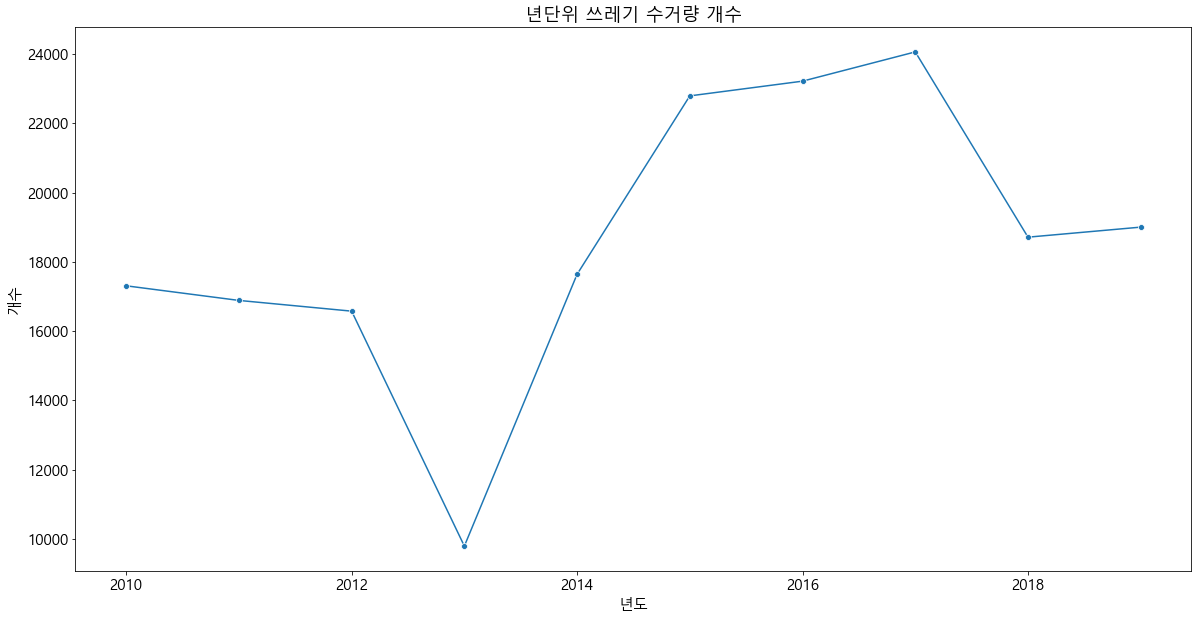

In [10]:
#년단위
plt.figure(figsize=(20,10))
sns.lineplot(x=year_pivot['년도'],y=year_pivot['개수'],marker='o',ci=None)
plt.title("년단위 쓰레기 수거량 개수")
plt.show()

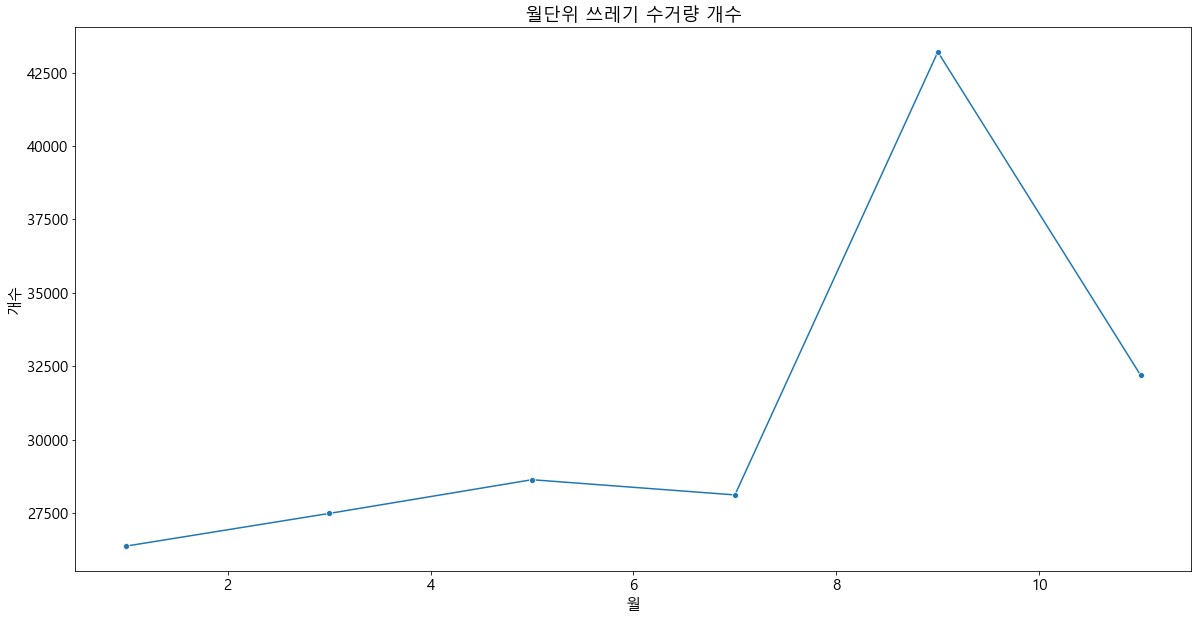

In [12]:
#월단위
month_pivot=year_month_cnt_pivot.pivot_table(index='월',
                 values='개수',
                 aggfunc=sum).reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(x=month_pivot['월'],y=month_pivot['개수'],marker='o',ci=None)
plt.title("월단위 쓰레기 수거량 개수")
plt.show()

### 1-2. 각 수집장소별 유형별 갯수(합) 

In [13]:
loc_type_pivot=trash.pivot_table(index=['수거장소','분류'],
                 values='개수',
                 aggfunc=sum).reset_index()

In [14]:
loc_type_pivot

,수거장소,분류,개수
0,거제 두모몽돌해변,고무,114
1,거제 두모몽돌해변,금속,1552
2,거제 두모몽돌해변,"기타 (담배, 중국 우유팩)",1
3,거제 두모몽돌해변,기타(+혼합재질),900
4,거제 두모몽돌해변,"기타(스폰지, 물휴지 등)",38
5,거제 두모몽돌해변,기타(일회용 위생장갑 등),63
6,거제 두모몽돌해변,목재,485
7,거제 두모몽돌해변,부표(막대형 주황),3
8,거제 두모몽돌해변,"비닐포장(빙과류, 과자봉지 등)",9
9,거제 두모몽돌해변,스티로폼,3987


[]

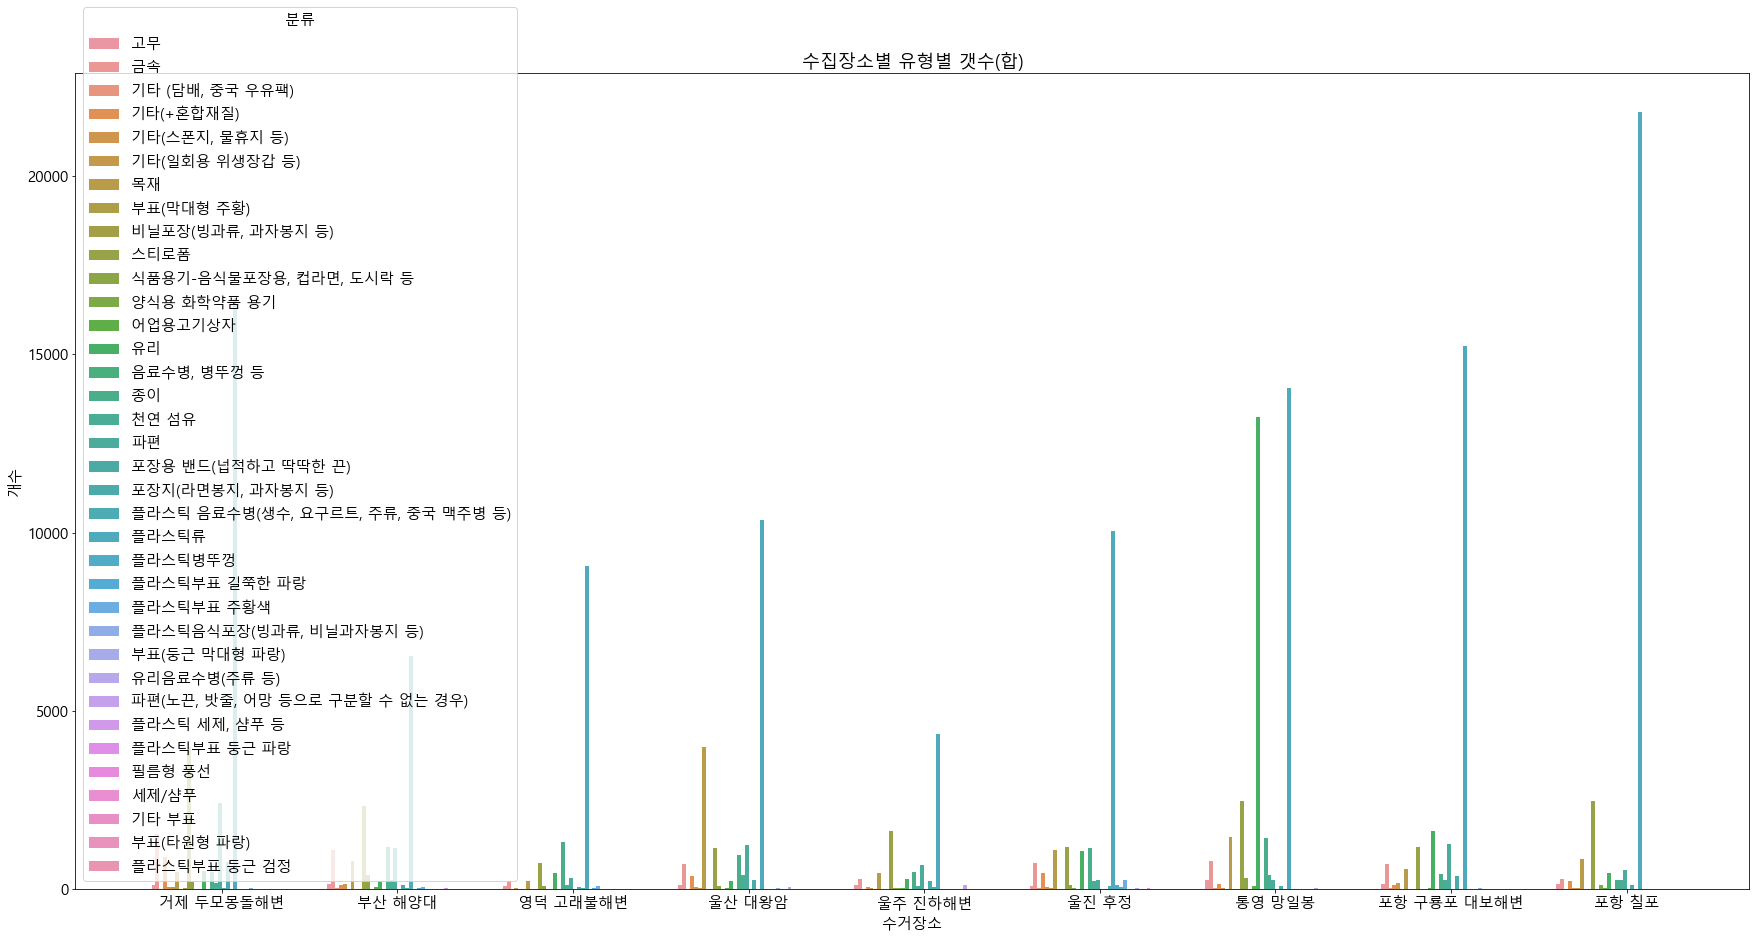

In [15]:
plt.figure(figsize=(30, 15))
sns.barplot(data=loc_type_pivot,x='수거장소',y='개수',hue='분류',ci=None)
plt.title("수집장소별 유형별 갯수(합)")
plt.plot()

In [16]:
# 수거장소별 top3 유형
sort_pivot=loc_type_pivot.sort_values(['수거장소','개수'],ascending=False).head(50)

In [17]:
top3_df=pd.DataFrame(loc_type_pivot.groupby(['수거장소', '분류'])['개수'].agg('sum').groupby(level=0).nlargest(3)).droplevel(0).reset_index()

[]

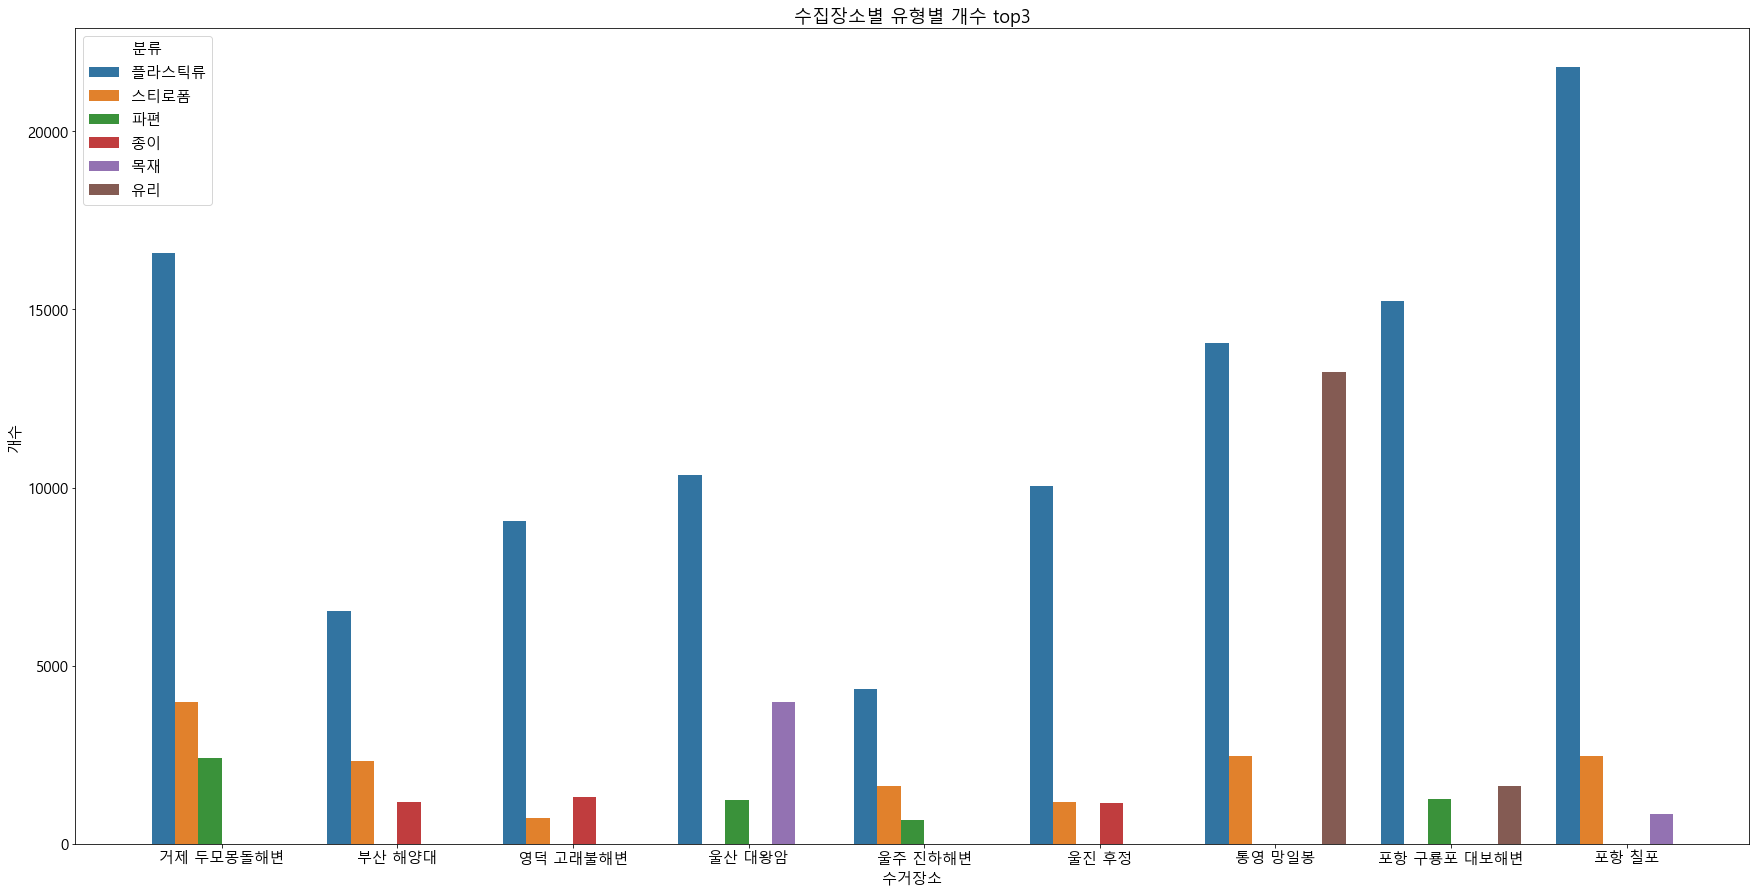

In [18]:
plt.figure(figsize=(30, 15))
sns.barplot(data=top3_df,x='수거장소',y='개수',hue='분류',ci=None)
plt.title("수집장소별 유형별 개수 top3")

plt.plot()

플라스틱이 가장 많다는 것을 확실히 볼 수 있고</br>
마산봉암 갯벌은 스티로폼이,</br>
통영 망일봉은 유리가 다른지역에 비해 많이 발견되는 것을 알 수 있다.

In [19]:
top3_df.head(20)

,수거장소,분류,개수
0,거제 두모몽돌해변,플라스틱류,16570
1,거제 두모몽돌해변,스티로폼,3987
2,거제 두모몽돌해변,파편,2403
3,부산 해양대,플라스틱류,6521
4,부산 해양대,스티로폼,2330
5,부산 해양대,종이,1168
6,영덕 고래불해변,플라스틱류,9060
7,영덕 고래불해변,종이,1317
8,영덕 고래불해변,스티로폼,736
9,울산 대왕암,플라스틱류,10364


### 1-3. 월별 top3 분류중의 변화

### 1-4. 울산 일산해수욕장 방문객수 vs 쓰레기 갯수

In [20]:
beach[beach['해수욕장명']=='일산해수욕장'].sort_values('월')

NameError: name 'beach' is not defined

In [21]:
trash_beach.columns

NameError: name 'trash_beach' is not defined

In [22]:
trash_beach[(trash_beach['수거장소']=='울산 대왕암')|(trash_beach['수거장소']=='울산 진하해변')].pivot_table(index=["수거장소","년도","월"],values='개수',aggfunc='sum')

NameError: name 'trash_beach' is not defined

# 통계분석 --------------------------------------------------------------------------------------------------------------------------------------

# 1. 카이제곱 검정

###  1-1. 지역과 쓰레기 유형에 따른 쓰레기 관측 기대빈도가 다른가

In [168]:
cross_table=loc_type_pivot.pivot("수거장소", "분류", "개수")
cross_table=cross_table.fillna(0)
cross_table

분류,고무,금속,"기타 (담배, 중국 우유팩)",기타 부표,기타(+혼합재질),"기타(스폰지, 물휴지 등)",기타(일회용 위생장갑 등),목재,부표(둥근 막대형 파랑),부표(막대형 주황),부표(타원형 파랑),"비닐포장(빙과류, 과자봉지 등)",세제/샴푸,스티로폼,"식품용기-음식물포장용, 컵라면, 도시락 등",양식용 화학약품 용기,어업용고기상자,유리,유리음료수병(주류 등),"음료수병, 병뚜껑 등",종이,천연 섬유,파편,"파편(노끈, 밧줄, 어망 등으로 구분할 수 없는 경우)",포장용 밴드(넙적하고 딱딱한 끈),"포장지(라면봉지, 과자봉지 등)","플라스틱 세제, 샴푸 등","플라스틱 음료수병(생수, 요구르트, 주류, 중국 맥주병 등)",플라스틱류,플라스틱병뚜껑,플라스틱부표 길쭉한 파랑,플라스틱부표 둥근 검정,플라스틱부표 둥근 파랑,플라스틱부표 주황색,"플라스틱음식포장(빙과류, 비닐과자봉지 등)",필름형 풍선
수거장소,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
거제 두모몽돌해변,114.0,1552.0,1.0,0.0,900.0,38.0,63.0,485.0,0.0,3.0,0.0,9.0,0.0,3987.0,190.0,8.0,1.0,508.0,0.0,8.0,483.0,175.0,2403.0,0.0,10.0,758.0,0.0,2.0,16570.0,2.0,1.0,0.0,0.0,5.0,21.0,0.0
부산 해양대,141.0,1076.0,9.0,0.0,110.0,139.0,6.0,774.0,2.0,3.0,0.0,0.0,0.0,2330.0,401.0,5.0,40.0,209.0,2.0,0.0,1168.0,233.0,1154.0,2.0,2.0,115.0,1.0,30.0,6521.0,4.0,16.0,0.0,20.0,45.0,7.0,2.0
영덕 고래불해변,67.0,211.0,6.0,0.0,18.0,3.0,4.0,216.0,1.0,1.0,0.0,0.0,0.0,736.0,67.0,8.0,4.0,442.0,0.0,0.0,1317.0,117.0,312.0,4.0,0.0,60.0,5.0,27.0,9060.0,5.0,34.0,0.0,7.0,71.0,7.0,0.0
울산 대왕암,111.0,689.0,4.0,0.0,351.0,59.0,30.0,3992.0,0.0,0.0,0.0,8.0,0.0,1155.0,81.0,7.0,9.0,232.0,0.0,4.0,942.0,395.0,1230.0,46.0,8.0,249.0,0.0,3.0,10364.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
울주 진하해변,113.0,284.0,4.0,0.0,38.0,23.0,4.0,452.0,1.0,2.0,0.0,0.0,2.0,1619.0,36.0,10.0,24.0,279.0,0.0,2.0,473.0,90.0,674.0,114.0,8.0,205.0,0.0,39.0,4358.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
울진 후정,85.0,724.0,24.0,2.0,452.0,39.0,17.0,1097.0,0.0,5.0,3.0,0.0,1.0,1164.0,117.0,9.0,3.0,1066.0,31.0,7.0,1139.0,205.0,234.0,5.0,0.0,8.0,5.0,76.0,10043.0,100.0,38.0,3.0,28.0,253.0,4.0,0.0
통영 망일봉,244.0,769.0,15.0,0.0,146.0,12.0,2.0,1456.0,0.0,0.0,0.0,0.0,0.0,2465.0,298.0,5.0,81.0,13231.0,0.0,0.0,1431.0,390.0,248.0,11.0,0.0,69.0,0.0,0.0,14058.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0
포항 구룡포 대보해변,124.0,685.0,14.0,0.0,110.0,151.0,7.0,560.0,0.0,0.0,0.0,0.0,0.0,1185.0,2.0,3.0,27.0,1610.0,1.0,0.0,409.0,258.0,1268.0,3.0,0.0,367.0,0.0,8.0,15244.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
포항 칠포,140.0,283.0,4.0,0.0,218.0,11.0,10.0,840.0,0.0,0.0,0.0,1.0,0.0,2470.0,7.0,116.0,11.0,448.0,0.0,0.0,252.0,251.0,522.0,0.0,0.0,106.0,2.0,5.0,21796.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0


In [169]:
import scipy.stats

chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(cross_table)

In [170]:
chi2

75852.75783614523

In [171]:
dof

280

In [172]:
pvalue
# 결론 : 수거장소와 유형은 서로 독립이 아님

0.0

# 2. 상관분석

### 2-1. 해수욕장 관람객 수 vs 해수욕장에서 나올만한 쓰레기 유형의 관계

In [251]:
trash=pd.read_csv("C:\\Users\\User\\BigData\\bigdata\\project/trash.csv",encoding='cp949')
trash_beach_list=trash[(trash['상세분류']=='캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등')|
                 (trash['상세분류']=='나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등')|
                 (trash['상세분류']=='스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)')|
                 (trash['상세분류']=='음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='음료수병, 각종 뚜껑')|
                 (trash['상세분류']=='비닐봉지')|
                 (trash['상세분류']=='1회용품 접시·숟가락·빨대 등')|
                 (trash['상세분류']=='음식물포장용기(고추장통, 간장병 등)')|
                 (trash['상세분류']=='폭죽/불꽃놀이 용품')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='담배꽁초')|
                 (trash['상세분류']=='라이터')]

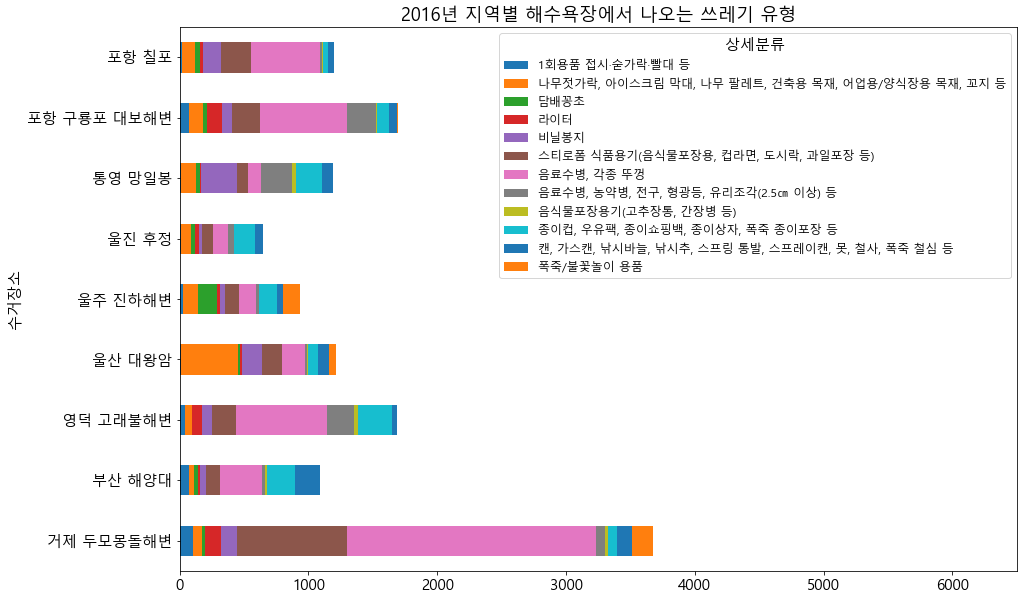

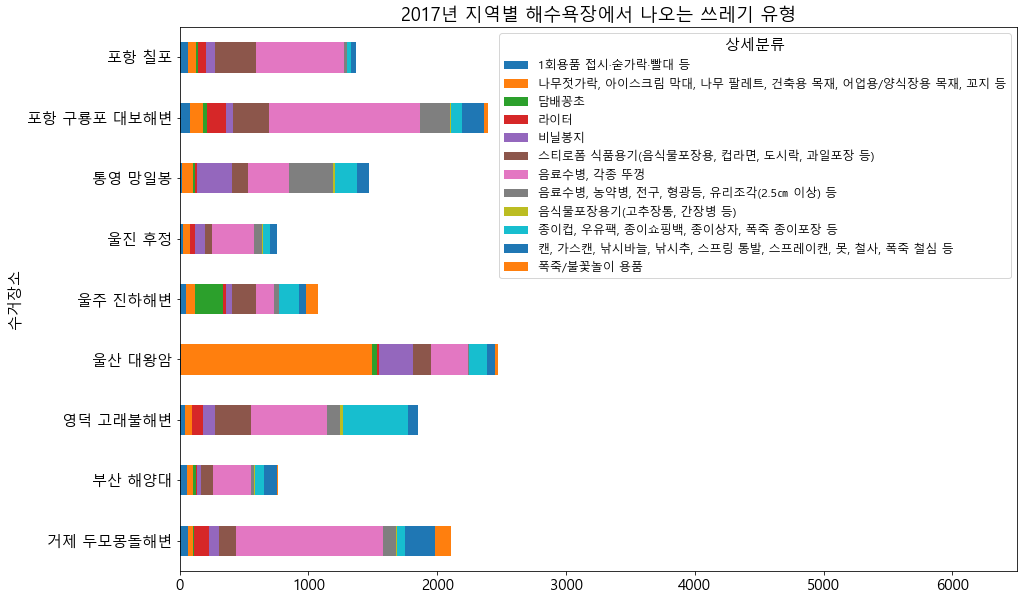

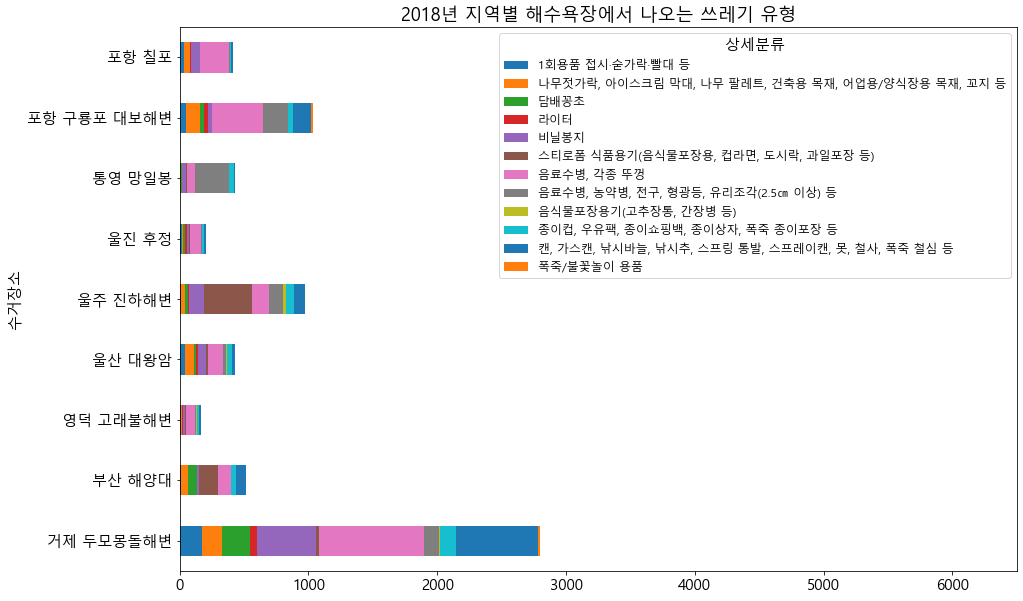

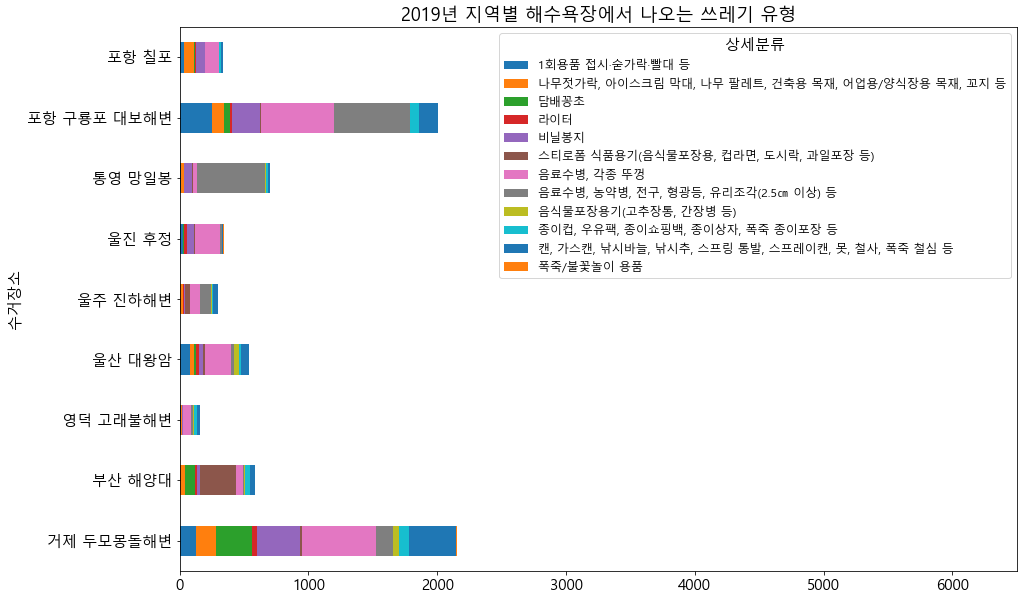

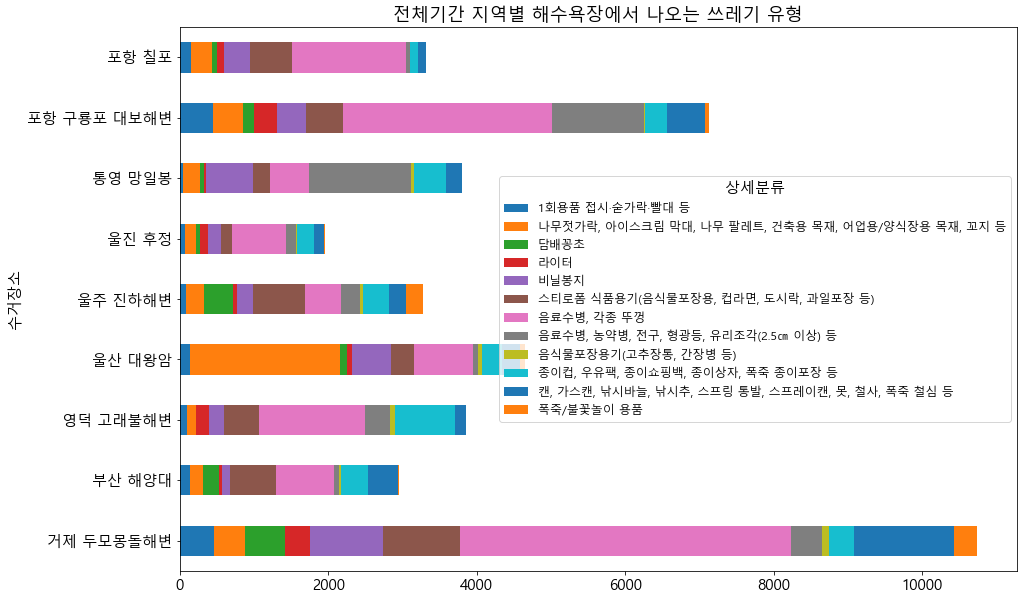

In [253]:
for i in range(2016,2020):
    trash_beach=trash_beach_list[trash_beach_list['년도']==i]
    쓰상=trash_beach.pivot_table(index=['수거장소','상세분류'],values='개수',aggfunc='sum').reset_index()
    a_pivot=쓰상.pivot('수거장소','상세분류','개수')
    plt.rcParams["figure.figsize"] = (15, 10)
    a_pivot.plot.barh( stacked=True)
    plt.rc('legend', fontsize=12)
    plt.title(str(i)+"년 지역별 해수욕장에서 나오는 쓰레기 유형")
    plt.xlim((0,6500))
    plt.show()
    
    
trash_beach=trash_beach_list[trash_beach_list['년도']>=2016]
쓰상=trash_beach.pivot_table(index=['수거장소','상세분류'],values='개수',aggfunc='sum').reset_index()
a_pivot=쓰상.pivot('수거장소','상세분류','개수')
plt.rcParams["figure.figsize"] = (15, 10)
a_pivot.plot.barh( stacked=True)
plt.rc('legend', fontsize=12)
plt.title("전체기간 지역별 해수욕장에서 나오는 쓰레기 유형")
plt.show()

2016년 울산 대왕암이 방문객수가 압도적으로 많았음에도 불구하고</br>
쓰레기량은 많지 않았다.
반면 거제는 일회용품관련 너무 많이 나오기 때문에 시민의식 개선, 규제를 필요하다 

In [186]:
trash

,년도,수거장소,월,일,분류,상세분류,개수,위도,경도,측정소
0,2019,통영 망일봉,1,1,플라스틱류,"끈(노끈, 포장용끈)",1,34.84861,128.430967,통영
1,2019,통영 망일봉,1,1,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",1,34.84861,128.430967,통영
2,2019,통영 망일봉,1,1,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",1,34.84861,128.430967,통영
3,2019,통영 망일봉,1,1,종이,"종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등",1,34.84861,128.430967,통영
4,2019,통영 망일봉,1,1,천연 섬유,"옷, 모자, 양말, 천, 장갑(면장갑, 목장갑, 코팅목장갑) 등 천연 섬유만 해당",1,34.84861,128.430967,통영
...,...,...,...,...,...,...,...,...,...,...
17601,2010,마산 봉암갯벌,1,1,플라스틱류,"음식물포장지(라면봉지, 과자봉지 등)",270,35.21657,128.621966,마산
17602,2010,마산 봉암갯벌,1,1,플라스틱류,"1회용컵, 접시, 포크, 나이프, 숟가락, 그릇 등",4,35.21657,128.621966,마산
17603,2010,마산 봉암갯벌,1,1,플라스틱류,각종 뚜껑,33,35.21657,128.621966,마산
17604,2010,마산 봉암갯벌,1,1,플라스틱류,"음료수병 (플라스틱병조각,2리터이하)",30,35.21657,128.621966,마산


In [254]:
a=trash[trash['년도']==2019][['분류','상세분류']]
a.drop_duplicates().sort_values('분류').reset_index(drop=True).to_csv("최근.csv",encoding='cp949')

In [255]:
pd.set_option('display.max_rows', 300)
b=trash[trash['년도']<2018][['분류','상세분류']]
b.drop_duplicates().sort_values('분류').reset_index(drop=True).to_csv("과거.csv",encoding='cp949')

월별 해수욕장에서 나오는 쓰레기 종류 파악

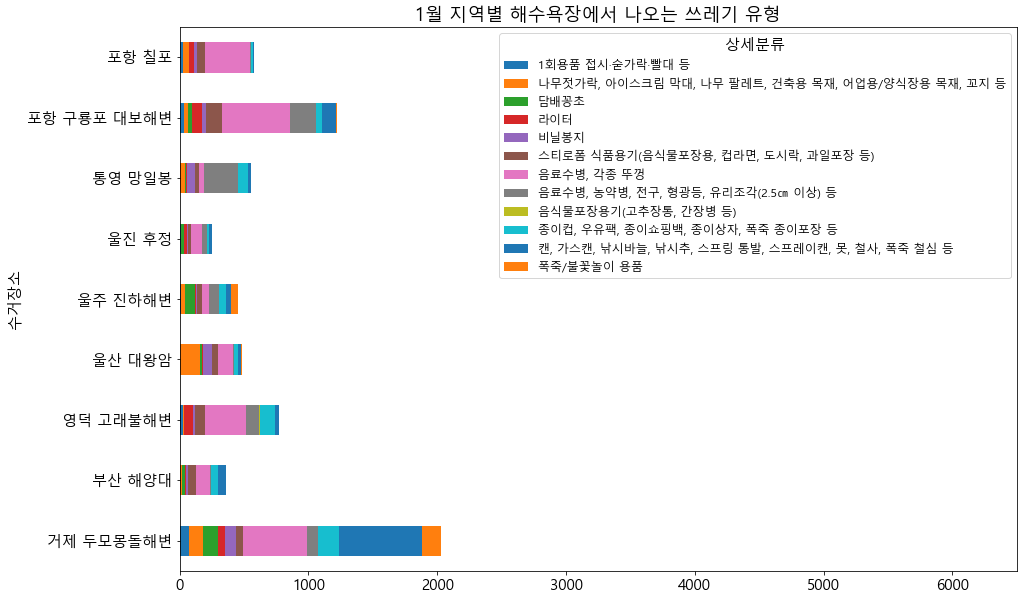

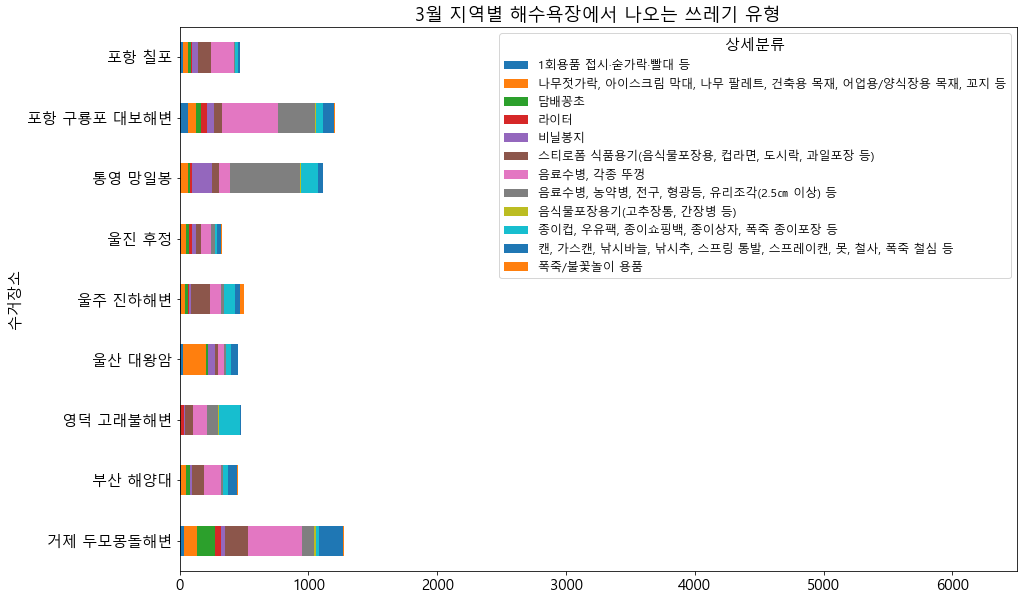

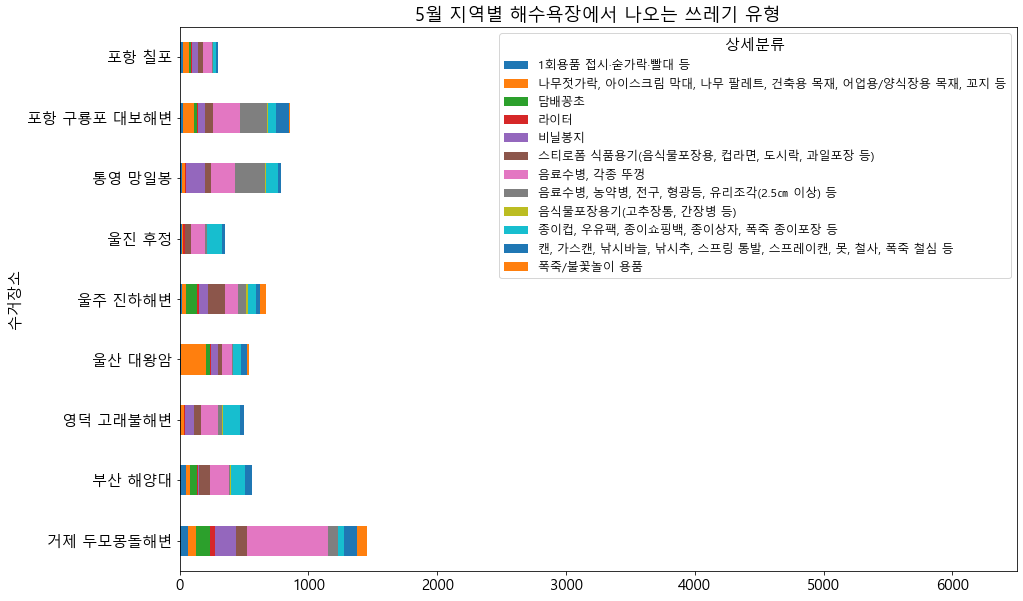

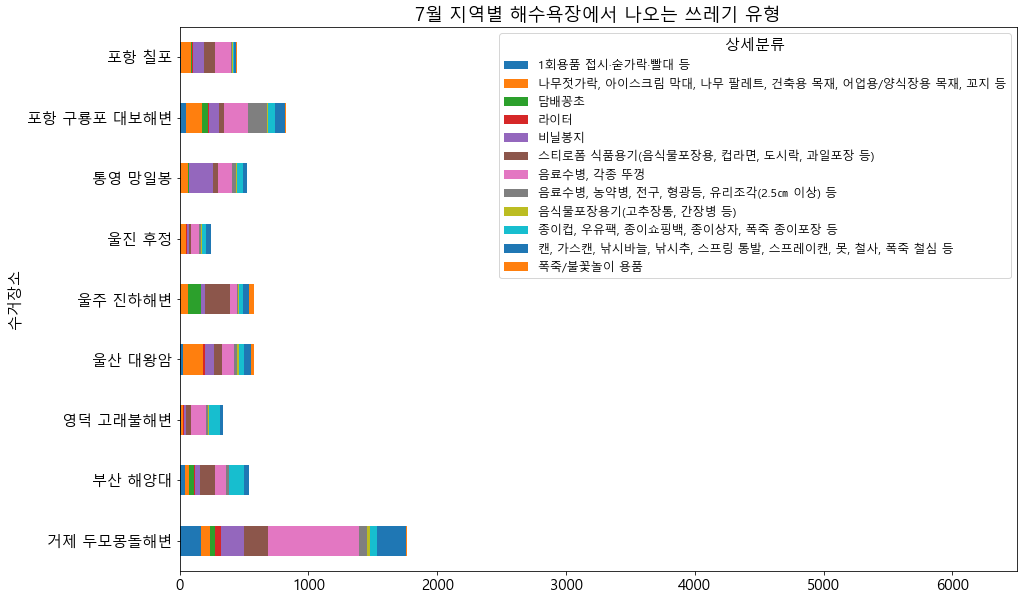

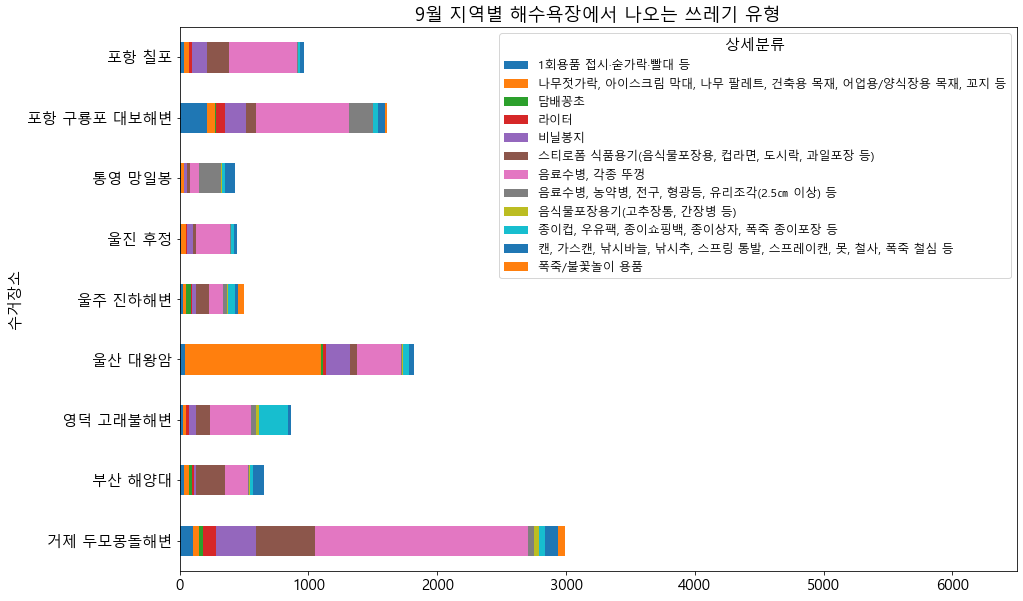

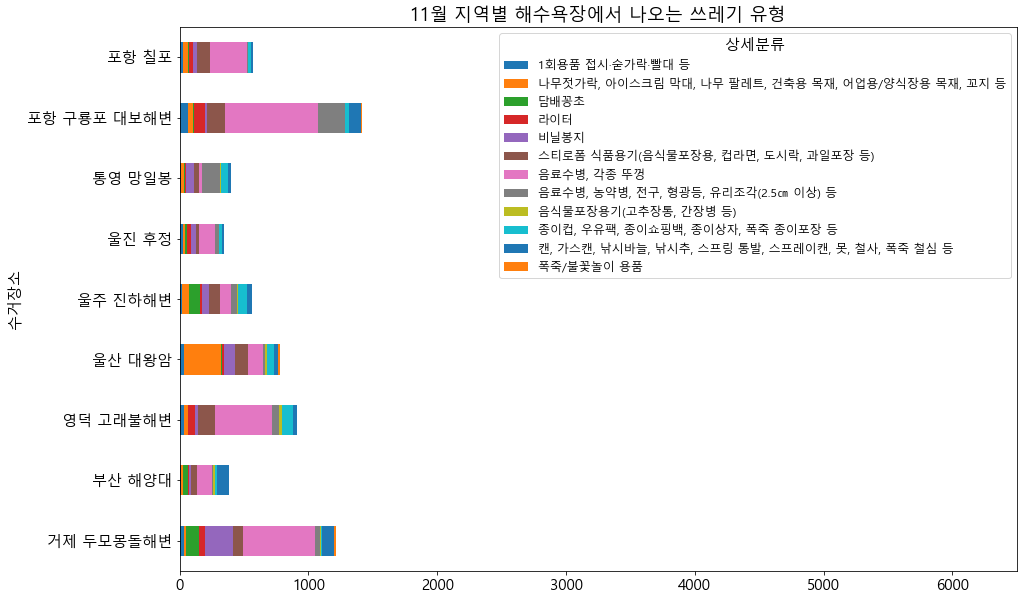

In [257]:
for i in [1,3,5,7,9,11]:
    trash_beach=trash_beach_list[trash_beach_list['년도']>=2016]
    trash_beach=trash_beach[trash_beach['월']==i]
    쓰상2=trash_beach.pivot_table(index=['수거장소','상세분류'],values='개수',aggfunc='sum').reset_index()
    a_pivot=쓰상2.pivot('수거장소','상세분류','개수')
    plt.rcParams["figure.figsize"] = (15, 10)
    a_pivot.plot.barh( stacked=True)
    plt.rc('legend', fontsize=12)
    plt.title(str(i)+"월 지역별 해수욕장에서 나오는 쓰레기 유형")
    plt.xlim((0,6500))
    plt.show()

### 2-2. 쓰레기 수거장별 주변 항구 수 vs 항구에서 나오는 쓰레기 유형과의 관계

In [179]:
harbor_cnt=harbor.pivot_table(index='수거장소',
                  values='항구명',
                  aggfunc='count').reset_index()

trash_harbor = pd.merge(trash,harbor_cnt,how='left')

In [180]:
trash_harbor=trash_harbor[(trash_harbor['상세분류']=='스티로폼 어상자')|
                         (trash_harbor['상세분류']=='스티로폼 부표')|
                         (trash_harbor['상세분류']=='가짜미끼, 형광찌, 낚시 미끼통')|
                         (trash_harbor['상세분류']=='밧줄(꼬인 것, 어업용)')|
                         (trash_harbor['상세분류']=='양식용화학약품용기')|
                         (trash_harbor['상세분류']=='플라스틱 부표')|
                         (trash_harbor['상세분류']=='어망')|
                         (trash_harbor['상세분류']=='통발, 장어통발용 미끼통')|
                         (trash_harbor['상세분류']=='낚싯줄')]

In [181]:
trash_harbor.columns=['년도', '수거장소', '월', '일', '분류', '상세분류', '개수', '위도', '경도', '측정소', '항구수']

In [182]:
duple_cnt=trash_harbor[['수거장소','항구수']].drop_duplicates()

In [183]:
cnt_count=pd.merge(trash_harbor.pivot_table(index='수거장소',values='개수',aggfunc='sum').reset_index(),duple_cnt,how='left')
cnt_count

,수거장소,개수,항구수
0,거제 두모몽돌해변,6247,5
1,부산 해양대,2960,2
2,영덕 고래불해변,3590,3
3,울산 대왕암,3556,4
4,울주 진하해변,1965,2
5,울진 후정,3859,2
6,통영 망일봉,6470,7
7,포항 구룡포 대보해변,5428,4
8,포항 칠포,7780,8


In [184]:
cnt_count.sort_values('항구수').to_csv('lm.csv',encoding='cp949')

In [186]:
cnt_count.corr(method='pearson')

,개수,항구수
개수,1.000000,0.917799
항구수,0.917799,1.000000


In [187]:
# 회귀식은 r 참고

### 2-3.지역별 어항에서 나오는 유형 비율 막대그래프

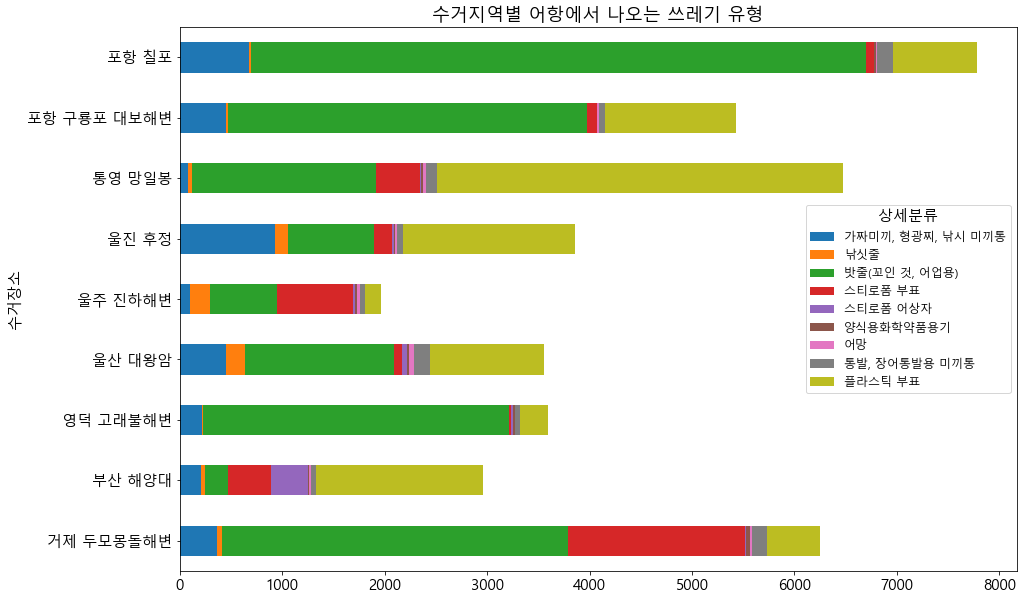

In [188]:
장상개=trash_harbor.pivot_table(index=['수거장소','상세분류'],values='개수',aggfunc='sum').reset_index()
a_pivot=장상개.pivot('수거장소','상세분류','개수')
plt.rcParams["figure.figsize"] = (15, 10)
a_pivot.plot.barh( stacked=True)
plt.title('수거지역별 어항에서 나오는 쓰레기 유형')
plt.show()

# 모델링

### 1. 데이터 결합     쓰레기 바람 해변   즉 2016년 이후 자료!

trash+해수욕장 방문객 수 df

In [345]:
trash=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/trash.csv',encoding='cp949')
beach=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/merge_beach.csv',encoding='cp949')
trash=trash[(trash['상세분류']=='캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등')|
                 (trash['상세분류']=='나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등')|
                 (trash['상세분류']=='스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)')|
                 (trash['상세분류']=='음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='음료수병, 각종 뚜껑')|
                 (trash['상세분류']=='비닐봉지')|
                 (trash['상세분류']=='1회용품 접시·숟가락·빨대 등')|
                 (trash['상세분류']=='음식물포장용기(고추장통, 간장병 등)')|
                 (trash['상세분류']=='폭죽/불꽃놀이 용품')|
                 (trash['상세분류']=='종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등')|
                 (trash['상세분류']=='담배꽁초')|
                 (trash['상세분류']=='라이터')]

쓰레기+바람

In [346]:
trash_m9=trash[trash['월']==9]
trash_m9.head(5)

,년도,수거장소,월,일,분류,상세분류,개수,위도,경도,측정소
71,2019,포항 칠포,9,1,유리,"음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등",1,36.132391,129.390274,포항
74,2019,포항 칠포,9,1,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",3,36.132391,129.390274,포항
77,2019,포항 칠포,9,1,플라스틱류,1회용품 접시·숟가락·빨대 등,9,36.132391,129.390274,포항
78,2019,포항 칠포,9,1,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",15,36.132391,129.390274,포항
80,2019,포항 칠포,9,1,플라스틱류,"음료수병, 각종 뚜껑",22,36.132391,129.390274,포항


In [347]:
#풍향 7,8월 평균
wind_avg_78=wind[(wind['월']==7)|(wind['월']==8)].pivot_table(index=['년도','측정소'],values=['평균풍향(deg)','평균풍속(m/s)'],aggfunc='mean').reset_index()
wind_avg_78.head(5)

,년도,측정소,평균풍속(m/s),평균풍향(deg)
0,2008,거제도,3.053472,141.083818
1,2008,마산,3.273645,168.244862
2,2008,부산,2.432783,152.925884
3,2008,통영,2.410911,158.951336
4,2009,거제도,3.841572,118.689435


In [348]:
trash_wind=pd.merge(trash_m9, wind_avg_78,on=['년도','측정소'])
trash_wind.head(5)

,년도,수거장소,월,일,분류,상세분류,개수,위도,경도,측정소,평균풍속(m/s),평균풍향(deg)
0,2019,포항 칠포,9,1,유리,"음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등",1,36.132391,129.390274,포항,4.12319,171.233958
1,2019,포항 칠포,9,1,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",3,36.132391,129.390274,포항,4.12319,171.233958
2,2019,포항 칠포,9,1,플라스틱류,1회용품 접시·숟가락·빨대 등,9,36.132391,129.390274,포항,4.12319,171.233958
3,2019,포항 칠포,9,1,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",15,36.132391,129.390274,포항,4.12319,171.233958
4,2019,포항 칠포,9,1,플라스틱류,"음료수병, 각종 뚜껑",22,36.132391,129.390274,포항,4.12319,171.233958


쓰레기_바람+해변

In [349]:
visit_beach_78=visit_beach.pivot_table(index=['년도','수거장소','수거장소에 대한해수욕장의 상대적 위치'],values='방문객수',aggfunc='sum').reset_index()

In [350]:
visit_beach_78_dummy=visit_beach_78.pivot(['년도','수거장소'],'수거장소에 대한해수욕장의 상대적 위치','방문객수').reset_index().fillna(0)
visit_beach_78_dummy.head(6)

수거장소에 대한해수욕장의 상대적 위치,년도,수거장소,남,남동,남서,동,북,북동,북서,서,서북,일치
0,2016,거제 두모몽돌해변,48460.0,41048.0,129258.0,0.0,2377.0,0.0,6276.0,0.0,0.0,0.0
1,2016,마산 봉암갯벌,50043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,영덕 고래불해변,35996.0,0.0,0.0,0.0,82337.0,0.0,0.0,0.0,0.0,354599.0
3,2016,울산 대왕암,0.0,0.0,391851.0,0.0,562550.0,0.0,0.0,1798930.0,0.0,0.0
4,2016,울주 진하해변,0.0,0.0,30189521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016,울진 후정,45309.0,0.0,0.0,0.0,0.0,0.0,10600.0,0.0,0.0,0.0


In [351]:
trash_wind_beach=pd.merge(trash_wind,visit_beach_78_dummy,on=['년도','수거장소'])

In [352]:
trash_wind_beach.head(10)

,년도,수거장소,월,일,분류,상세분류,개수,위도,경도,측정소,평균풍속(m/s),평균풍향(deg),남,남동,남서,동,북,북동,북서,서,서북,일치
0,2019,포항 칠포,9,1,유리,"음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등",1,36.132391,129.390274,포항,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
1,2019,포항 칠포,9,1,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",3,36.132391,129.390274,포항,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
2,2019,포항 칠포,9,1,플라스틱류,1회용품 접시·숟가락·빨대 등,9,36.132391,129.390274,포항,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
3,2019,포항 칠포,9,1,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",15,36.132391,129.390274,포항,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
4,2019,포항 칠포,9,1,플라스틱류,"음료수병, 각종 뚜껑",22,36.132391,129.390274,포항,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
5,2019,포항 칠포,9,1,플라스틱류,비닐봉지,42,36.132391,129.390274,포항,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
6,2019,포항 구룡포 대보해변,9,1,종이,"종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등",1,35.978017,129.473394,포항,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0
7,2019,포항 구룡포 대보해변,9,1,플라스틱류,라이터,5,35.978017,129.473394,포항,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0
8,2019,포항 구룡포 대보해변,9,1,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",16,35.978017,129.473394,포항,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0
9,2019,포항 구룡포 대보해변,9,1,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",17,35.978017,129.473394,포항,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0


In [353]:
trash_wind_beach.columns


Index(['년도', '수거장소', '월', '일', '분류', '상세분류', '개수', '위도', '경도', '측정소',
       '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동', '북', '북동', '북서', '서',
       '서북', '일치'],
      dtype='object')

In [354]:
# 필요한 컬럼만 추출
f_trash_wind_beach=trash_wind_beach[['년도', '수거장소', '상세분류', '개수', '위도', '경도', 
       '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동', '북', '북동', '북서', '서',
       '서북', '일치']].copy()

In [355]:
f_trash_wind_beach.head(10)

,년도,수거장소,상세분류,개수,위도,경도,평균풍속(m/s),평균풍향(deg),남,남동,남서,동,북,북동,북서,서,서북,일치
0,2019,포항 칠포,"음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등",1,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
1,2019,포항 칠포,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",3,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
2,2019,포항 칠포,1회용품 접시·숟가락·빨대 등,9,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
3,2019,포항 칠포,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",15,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
4,2019,포항 칠포,"음료수병, 각종 뚜껑",22,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
5,2019,포항 칠포,비닐봉지,42,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0
6,2019,포항 구룡포 대보해변,"종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등",1,35.978017,129.473394,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0
7,2019,포항 구룡포 대보해변,라이터,5,35.978017,129.473394,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0
8,2019,포항 구룡포 대보해변,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",16,35.978017,129.473394,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0
9,2019,포항 구룡포 대보해변,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",17,35.978017,129.473394,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0


In [357]:
# 더미화
dummy_df=pd.get_dummies(f_trash_wind_beach,columns = ['수거장소','상세분류'])

In [358]:
dummy_df.columns

Index(['년도', '개수', '위도', '경도', '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거장소_거제 두모몽돌해변', '수거장소_영덕 고래불해변',
       '수거장소_울산 대왕암', '수거장소_울주 진하해변', '수거장소_울진 후정', '수거장소_통영 망일봉',
       '수거장소_포항 구룡포 대보해변', '수거장소_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_담배꽁초',
       '상세분류_라이터', '상세분류_비닐봉지', '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)',
       '상세분류_음료수병, 각종 뚜껑', '상세분류_음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등',
       '상세분류_음식물포장용기(고추장통, 간장병 등)', '상세분류_종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등',
       '상세분류_캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등',
       '상세분류_폭죽/불꽃놀이 용품'],
      dtype='object')

In [ ]:
dummy_df.sort_values(['수거장소_거제 두모몽돌해변', '수거장소_영덕 고래불해변',
       '수거장소_울산 대왕암', '수거장소_울주 진하해변', '수거장소_울진 후정', '수거장소_통영 망일봉',
       '수거장소_포항 구룡포 대보해변', '수거장소_포항 칠포'])

In [275]:
#dummy_df.to_csv('C:\\Users\\User\\BigData\\bigdata\\project/trash_wind_beach.csv',encoding='cp949')

In [360]:
dummy_df['년도']=dummy_df['년도'].astype('float64')
dummy_df['개수']=dummy_df['개수'].astype('float64')

In [362]:
dummy_df.columns

Index(['년도', '개수', '위도', '경도', '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거장소_거제 두모몽돌해변', '수거장소_영덕 고래불해변',
       '수거장소_울산 대왕암', '수거장소_울주 진하해변', '수거장소_울진 후정', '수거장소_통영 망일봉',
       '수거장소_포항 구룡포 대보해변', '수거장소_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_담배꽁초',
       '상세분류_라이터', '상세분류_비닐봉지', '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)',
       '상세분류_음료수병, 각종 뚜껑', '상세분류_음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등',
       '상세분류_음식물포장용기(고추장통, 간장병 등)', '상세분류_종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등',
       '상세분류_캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등',
       '상세분류_폭죽/불꽃놀이 용품'],
      dtype='object')

In [426]:
def rf(data):
    x = data[['년도', '위도', '경도', '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거장소_거제 두모몽돌해변', '수거장소_영덕 고래불해변',
       '수거장소_울산 대왕암', '수거장소_울주 진하해변', '수거장소_울진 후정', '수거장소_통영 망일봉',
       '수거장소_포항 구룡포 대보해변', '수거장소_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_담배꽁초',
       '상세분류_라이터', '상세분류_비닐봉지', '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)',
       '상세분류_음료수병, 각종 뚜껑', '상세분류_음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등',
       '상세분류_음식물포장용기(고추장통, 간장병 등)', '상세분류_종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등',
       '상세분류_캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등',
       '상세분류_폭죽/불꽃놀이 용품']]
    x = data[['년도', '위도', '경도', '평균풍속(m/s)', '평균풍향(deg)', '남', '남동', '남서', '동',
       '북', '북동', '북서', '서', '서북', '일치', '수거장소_거제 두모몽돌해변', '수거장소_영덕 고래불해변',
       '수거장소_울산 대왕암', '수거장소_울주 진하해변', '수거장소_울진 후정', '수거장소_통영 망일봉',
       '수거장소_포항 구룡포 대보해변', '수거장소_포항 칠포', '상세분류_1회용품 접시·숟가락·빨대 등',
       '상세분류_나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, 꼬지 등', '상세분류_담배꽁초',
       '상세분류_라이터', '상세분류_비닐봉지', '상세분류_스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)',
       '상세분류_음료수병, 각종 뚜껑', '상세분류_음료수병, 농약병, 전구, 형광등, 유리조각(2.5㎝ 이상) 등',
       '상세분류_음식물포장용기(고추장통, 간장병 등)', '상세분류_종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등',
       '상세분류_캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등',
       '상세분류_폭죽/불꽃놀이 용품']]
    y = data['개수']

    # 테스트 데이터 30%
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
    
    # 학습 진행
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(x_train, y_train)

    # 예측
    y_pred = forest.predict(x_test)
    print(y_pred)
    print(list(y_test))
    
    return pd.DataFrame(list(zip(list(y_test),list(y_pred))),columns =['실제','예측']).T

      
rf(dummy_df)

[ 36.   7.   5.   3.  75.   2.   2.   1.   5.   9.  17.   3.   3.   5.
   3.  13.   1.   2.   1.   2.   2.  12.   2.   1.  17.   4.  18.   1.
   4.   3.   2.   5.  19.  44.   2.   3.  10.  12.   2.   2.   9.   1.
 129.   2.   3.   9.   3.  21.   2.   5.   2.   6.   3.   3.  11.   1.
   2.   1.   4.   2.]
[5.0, 55.0, 7.0, 1.0, 112.0, 3.0, 3.0, 3.0, 1.0, 6.0, 3.0, 138.0, 1.0, 4.0, 4.0, 1.0, 16.0, 16.0, 30.0, 45.0, 3.0, 2.0, 3.0, 1.0, 5.0, 3.0, 1.0, 1.0, 21.0, 7.0, 12.0, 1.0, 221.0, 22.0, 3.0, 5.0, 2.0, 1.0, 2.0, 10.0, 2.0, 1.0, 1.0, 7.0, 3.0, 21.0, 1.0, 22.0, 2.0, 3.0, 2.0, 25.0, 8.0, 2.0, 5.0, 30.0, 2.0, 10.0, 15.0, 6.0]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
실제,5.0,55.0,7.0,1.0,112.0,3.0,3.0,3.0,1.0,6.0,3.0,138.0,1.0,4.0,4.0,1.0,16.0,16.0,30.0,45.0,3.0,2.0,3.0,1.0,5.0,3.0,1.0,1.0,21.0,7.0,12.0,1.0,221.0,22.0,3.0,5.0,2.0,1.0,2.0,10.0,2.0,1.0,1.0,7.0,3.0,21.0,1.0,22.0,2.0,3.0,2.0,25.0,8.0,2.0,5.0,30.0,2.0,10.0,15.0,6.0
예측,36.0,7.0,5.0,3.0,75.0,2.0,2.0,1.0,5.0,9.0,17.0,3.0,3.0,5.0,3.0,13.0,1.0,2.0,1.0,2.0,2.0,12.0,2.0,1.0,17.0,4.0,18.0,1.0,4.0,3.0,2.0,5.0,19.0,44.0,2.0,3.0,10.0,12.0,2.0,2.0,9.0,1.0,129.0,2.0,3.0,9.0,3.0,21.0,2.0,5.0,2.0,6.0,3.0,3.0,11.0,1.0,2.0,1.0,4.0,2.0


,년도,개수,위도,경도,평균풍속(m/s),평균풍향(deg),남,남동,남서,동,북,북동,북서,서,서북,일치,수거장소_거제 두모몽돌해변,수거장소_영덕 고래불해변,수거장소_울산 대왕암,수거장소_울주 진하해변,수거장소_울진 후정,수거장소_통영 망일봉,수거장소_포항 구룡포 대보해변,수거장소_포항 칠포,분류_스티로폼,분류_플라스틱류
0,2019.0,1.0,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0,0,0,0,0,0,0,0,1,0,1
1,2019.0,1.0,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0,0,0,0,0,0,0,0,1,0,1
2,2019.0,23.0,36.132391,129.390274,4.12319,171.233958,36230.0,18294.0,0.0,0.0,131413.0,0.0,0.0,0.0,0.0,16664.0,0,0,0,0,0,0,0,1,0,1
3,2019.0,12.0,35.978017,129.473394,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0,0,0,0,0,0,0,1,0,0,1
4,2019.0,13.0,35.978017,129.473394,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0,0,0,0,0,0,0,1,0,0,1
5,2019.0,125.0,35.978017,129.473394,4.12319,171.233958,0.0,0.0,291810.0,0.0,0.0,0.0,0.0,18294.0,36230.0,48990.0,0,0,0,0,0,0,1,0,0,1
6,2018.0,2.0,36.132391,129.390274,4.15594,143.530675,2472810.0,10070.0,0.0,0.0,1617880.0,0.0,0.0,0.0,0.0,38460.0,0,0,0,0,0,0,0,1,0,1
7,2018.0,1.0,36.132391,129.390274,4.15594,143.530675,2472810.0,10070.0,0.0,0.0,1617880.0,0.0,0.0,0.0,0.0,38460.0,0,0,0,0,0,0,0,1,0,1
8,2018.0,8.0,36.132391,129.390274,4.15594,143.530675,2472810.0,10070.0,0.0,0.0,1617880.0,0.0,0.0,0.0,0.0,38460.0,0,0,0,0,0,0,0,1,0,1
9,2018.0,3.0,36.132391,129.390274,4.15594,143.530675,2472810.0,10070.0,0.0,0.0,1617880.0,0.0,0.0,0.0,0.0,38460.0,0,0,0,0,0,0,0,1,1,0


167

바람만 고려

In [428]:
trash=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/trash.csv',encoding='cp949')
wind=pd.read_csv('C:\\Users\\User\\BigData\\bigdata\\project/wind_avg.csv',encoding='cp949')

In [436]:
wind.columns

Index(['년도', '월', '평균풍향(deg)', '평균풍속(m/s)', '측정소'], dtype='object')

In [446]:
wind_shift2=wind[['평균풍향(deg)','평균풍속(m/s)','측정소']].shift(1)

In [447]:
wind_shift2.columns=['평균풍향(deg)_sh', '평균풍속(m/s)_sh', '측정소_sh']

In [449]:
wind_shift=pd.concat([wind,wind_shift2],axis=1)[['년도','월','평균풍향(deg)_sh', '평균풍속(m/s)_sh', '측정소_sh']]

In [451]:
wind_shift.head(50)

,년도,월,평균풍향(deg)_sh,평균풍속(m/s)_sh,측정소_sh
0,2008,1,NaN,NaN,NaN
1,2008,2,156.062331,3.253527,거제도
2,2008,3,188.422334,2.228063,거제도
3,2008,4,152.323432,3.197278,거제도
4,2008,5,152.292539,3.180208,거제도
5,2008,6,154.370810,3.276091,거제도
6,2008,7,100.106206,4.911013,거제도
7,2008,8,178.167956,1.781945,거제도
8,2008,9,103.999681,4.324999,거제도
9,2008,10,94.475964,3.684445,거제도
